# Gestión de Riesgo

In [2]:
import statsmodels.api as sm
import numpy as np
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly
import warnings
import quandl
warnings.filterwarnings('ignore')

In [34]:
## Rendimiento

-0.005053811636321532
0.019306848155579603


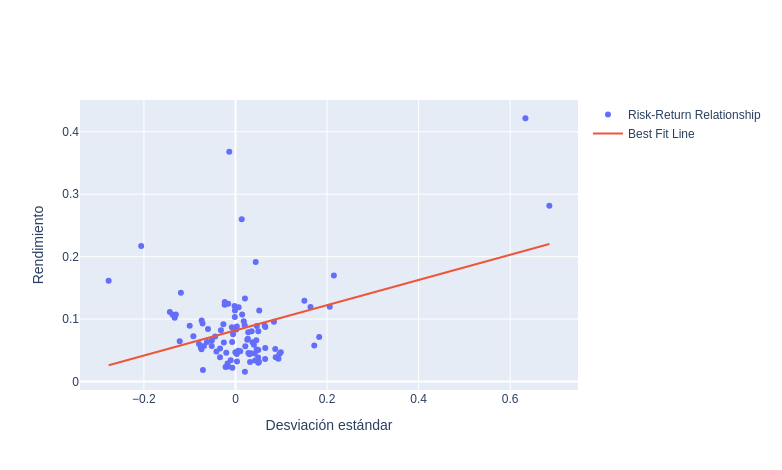

In [33]:
# Número de activos considerados 
n_assets = 5

# Número de simulaciones realizadas 
n_simulation = 500

# Establecer una semilla
np.random.seed(15)

# Generación de muestras aleatorias de distribución normal utilizadas como rendimientos 
returns = np.random.randn(n_assets, n_simulation)

# Generación de números aleatorios para calcular ponderaciones 
rand = np.random.rand(n_assets)

# Cálculo de ponderaciones
weights = rand/sum(rand)

# Función utilizada para calcular el rendimiento esperado de la cartera y la desviación estándar de la cartera 
def port_return(returns):
    rets = np.mean(returns, axis=1)
    cov = np.cov(rets.T, aweights=weights, ddof=1)
    portfolio_returns = np.dot(weights, rets.T)
    portfolio_std_dev = np.sqrt(np.dot(weights, np.dot(cov, weights)))
    return portfolio_returns, portfolio_std_dev
    
# Llamar al resultado de la función 
portfolio_returns, portfolio_std_dev = port_return(returns)

# Imprimir el resultado del rendimiento esperado de la cartera y desviación estándar de la cartera.
print(portfolio_returns)
print(portfolio_std_dev)

# Vuelvo a ejecutar la función 100 veces. 
portfolio = np.array([port_return(np.random.randn(n_assets, i))
for i in range(1, 101)])

# Para dibujar la línea de mejor ajuste, ejecuto una regresión lineal. 
best_fit = sm.OLS(portfolio[:, 1], sm.add_constant(portfolio[:, 0]))\
.fit().fittedvalues

# Dibujo un gráfico interactivo con fines de visualización.
fig = go.Figure()
fig.add_trace(go.Scatter(name='Risk-Return Relationship', x=portfolio[:,0],
y=portfolio[:,1], mode='markers'))
fig.add_trace(go.Scatter(name='Best Fit Line', x=portfolio[:,0],
y=best_fit, mode='lines'))
fig.update_layout(yaxis_title = 'Rendimiento', xaxis_title = 'Desviación estándar',
width=900, height=470)
fig.show()

## Selección Adversa
Supongamos que la función de utilidad del consumidor es: 
$$U(x) = e^{\gamma x}$$ 
donde x es el ingreso e γ es un parámetro, que toma valores entre 0 y 1.

El objetivo final de este ejemplo es decidir si se compra o no un seguro en función de la utilidad del consumidor. Para practicar, asumo que el ingreso es de $2$ USD y el costo del accidente es de $1,5$ USD. Ahora es el momento de calcular la probabilidad de pérdida, $\phi$, que está dada exógenamente y está distribuida uniformemente. Como último paso, para encontrar el equilibrio, tengo que definir la oferta y la demanda de cobertura de seguro. El siguiente bloque de código indica cómo podemos modelar la selección adversa.

The highest three probability of losses are [0.76865997 0.81628632 0.95157986]


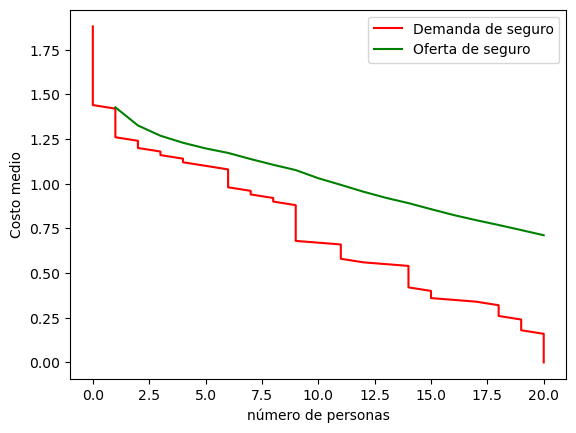

In [38]:
# Escribir una función para la función de utilidad con aversión al riesgo. 
def utility(x):
    return(np.exp(x ** gamma))

# Generación de muestras aleatorias a partir de distribución uniforme. 
pi = np.random.uniform(0,1,20)
pi = np.sort(pi)

# Eligiendo los últimos tres elementos. 
print('The highest three probability of losses are {}'.format(pi[-3:]))
y = 2
c = 1.5
Q = 5
D = 0.01
gamma = 0.4

# Redacción de una función para el suministro de contratos de seguro. 
def supply(Q):
    return(np.mean(pi[-Q:]) * c)

# Escribir una función para la demanda de contratos de seguro.
def demand(D):
    return(np.sum(utility(y - D) > pi * utility(y - c) + (1 - pi) * utility(y)))

plt.figure()
plt.plot([demand(i) for i in np.arange(0, 1.9, 0.02)], np.arange(0, 1.9,
0.02),
'r', label='Demanda de seguro')
plt.plot(range(1,21), [supply(j) for j in range(1,21)],'g', label='Oferta de seguro')
plt.ylabel("Costo medio")
plt.xlabel("número de personas")
plt.legend()
plt.show()